# Machine Learning in Python - Project 2

Due Friday, April 12th by 4 pm.

*Include contributors names in notebook metadata or here*

## Setup

*Install any packages here and load data*

In [19]:
# Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
## Random Forest
from sklearn.ensemble import RandomForestClassifier









# Suppress all warnings
warnings.filterwarnings("ignore")

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [20]:
# Load data in easyshare.csv
d = pd.read_csv("freddiemac.csv")
d.head()

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,zipcode,id_loan,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,prepaid,default
0,709.0,201703,9,204702,NaN,12,1,P,84,26,...,51300,F117Q1000376,N,360,2,Other sellers,Other servicers,NaN,0,1
1,649.0,201703,9,203202,33124.0,0,1,P,52,22,...,33100,F117Q1000418,C,180,2,Other sellers,Other servicers,NaN,1,0
2,747.0,201703,9,203702,41180.0,0,1,I,43,20,...,63100,F117Q1000479,N,240,2,Other sellers,Other servicers,NaN,1,0
3,711.0,201703,9,204702,20260.0,0,1,I,80,21,...,55800,F117Q1000523,P,360,2,Other sellers,Other servicers,NaN,1,0
4,751.0,201703,N,204702,NaN,35,1,P,95,24,...,75900,F117Q1000719,P,360,1,Other sellers,ARVESTCENTRALMTGECO,NaN,1,0


# Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a professional body (e.g. FreddiMac company or similar company). If you use any additional data sources, you should introduce them here and discuss why they were included.*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

# Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*You should also split your data into training and testing sets, ideally before you look to much into the features and relationships with the target*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. Feature engineering that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*If you decide to extract additional features from the full data (easyshare_all.csv), describe these variables here.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

## EDA

In [21]:
# Print the first few rows of the data
d.head(10)

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,zipcode,id_loan,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,prepaid,default
0,709.0,201703,9,204702,NaN,12,1,P,84,26,...,51300,F117Q1000376,N,360,2,Other sellers,Other servicers,NaN,0,1
1,649.0,201703,9,203202,33124.0,0,1,P,52,22,...,33100,F117Q1000418,C,180,2,Other sellers,Other servicers,NaN,1,0
2,747.0,201703,9,203702,41180.0,0,1,I,43,20,...,63100,F117Q1000479,N,240,2,Other sellers,Other servicers,NaN,1,0
3,711.0,201703,9,204702,20260.0,0,1,I,80,21,...,55800,F117Q1000523,P,360,2,Other sellers,Other servicers,NaN,1,0
4,751.0,201703,N,204702,NaN,35,1,P,95,24,...,75900,F117Q1000719,P,360,1,Other sellers,ARVESTCENTRALMTGECO,NaN,1,0
5,808.0,201703,9,203202,NaN,0,1,P,49,33,...,65700,F117Q1001077,N,180,2,Other sellers,Other servicers,NaN,1,0
6,634.0,201703,N,203202,NaN,0,1,P,55,37,...,42100,F117Q1001140,P,180,1,Other sellers,Other servicers,NaN,1,0
7,714.0,201703,9,204702,19804.0,0,1,I,80,22,...,48100,F117Q1001292,N,360,2,Other sellers,Other servicers,NaN,1,0
8,752.0,201703,9,203202,NaN,0,1,P,63,24,...,51300,F117Q1001382,C,180,2,Other sellers,Other servicers,NaN,1,0
9,673.0,201704,Y,204703,NaN,30,1,P,95,45,...,14800,F117Q1001443,P,360,2,Other sellers,Other servicers,NaN,0,1


In [22]:
# Describe the data
d.describe()

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr,prepaid,default
count,6103.000000,6104.000000,6104.000000,5510.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000
mean,744.762740,201735.558650,204456.275885,30746.564428,5.027031,1.030799,72.502785,35.964613,244066.186107,72.046527,4.386463,61015.612713,327.018676,1.482634,0.981488,0.018512
std,48.208044,44.837849,573.354730,11158.605589,10.526750,0.246957,20.808191,15.583786,131445.871930,20.809927,0.508065,29401.664859,68.374234,0.499739,0.134806,0.134806
min,549.000000,201702.000000,202504.000000,10180.000000,0.000000,1.000000,7.000000,3.000000,22000.000000,7.000000,2.625000,800.000000,96.000000,1.000000,0.000000,0.000000
25%,708.000000,201705.000000,204702.000000,19740.000000,0.000000,1.000000,65.000000,29.000000,143000.000000,64.000000,4.125000,33900.000000,360.000000,1.000000,1.000000,0.000000
50%,753.000000,201709.000000,204706.000000,33340.000000,0.000000,1.000000,77.000000,38.000000,218000.000000,75.000000,4.375000,65000.000000,360.000000,1.000000,1.000000,0.000000
75%,786.000000,201802.000000,204711.000000,40140.000000,0.000000,1.000000,80.000000,43.000000,328000.000000,80.000000,4.750000,89800.000000,360.000000,2.000000,1.000000,0.000000
max,832.000000,201901.000000,204812.000000,49740.000000,35.000000,4.000000,999.000000,999.000000,795000.000000,999.000000,6.125000,99900.000000,360.000000,2.000000,1.000000,1.000000


In [23]:
# Get the info of the data
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fico            6103 non-null   float64
 1   dt_first_pi     6104 non-null   int64  
 2   flag_fthb       6104 non-null   object 
 3   dt_matr         6104 non-null   int64  
 4   cd_msa          5510 non-null   float64
 5   mi_pct          6104 non-null   int64  
 6   cnt_units       6104 non-null   int64  
 7   occpy_sts       6104 non-null   object 
 8   cltv            6104 non-null   int64  
 9   dti             6104 non-null   int64  
 10  orig_upb        6104 non-null   int64  
 11  ltv             6104 non-null   int64  
 12  int_rt          6104 non-null   float64
 13  channel         6104 non-null   object 
 14  ppmt_pnlty      6066 non-null   object 
 15  prod_type       6104 non-null   object 
 16  st              6104 non-null   object 
 17  prop_type       6104 non-null   o

### Distribution of the target variable

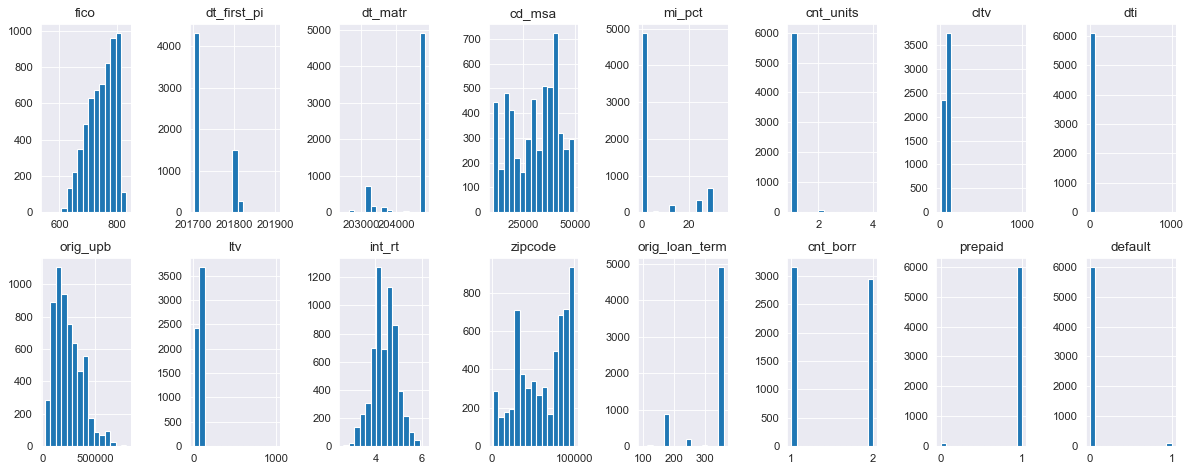

In [24]:
# Distribution of numerical features
numeric_cols = d.select_dtypes(include=[np.number]).columns

# Plot the histograms of the numerical features
d[numeric_cols].hist(bins=15, figsize=(15, 6), layout=(2, -1))
plt.tight_layout()
plt.show()

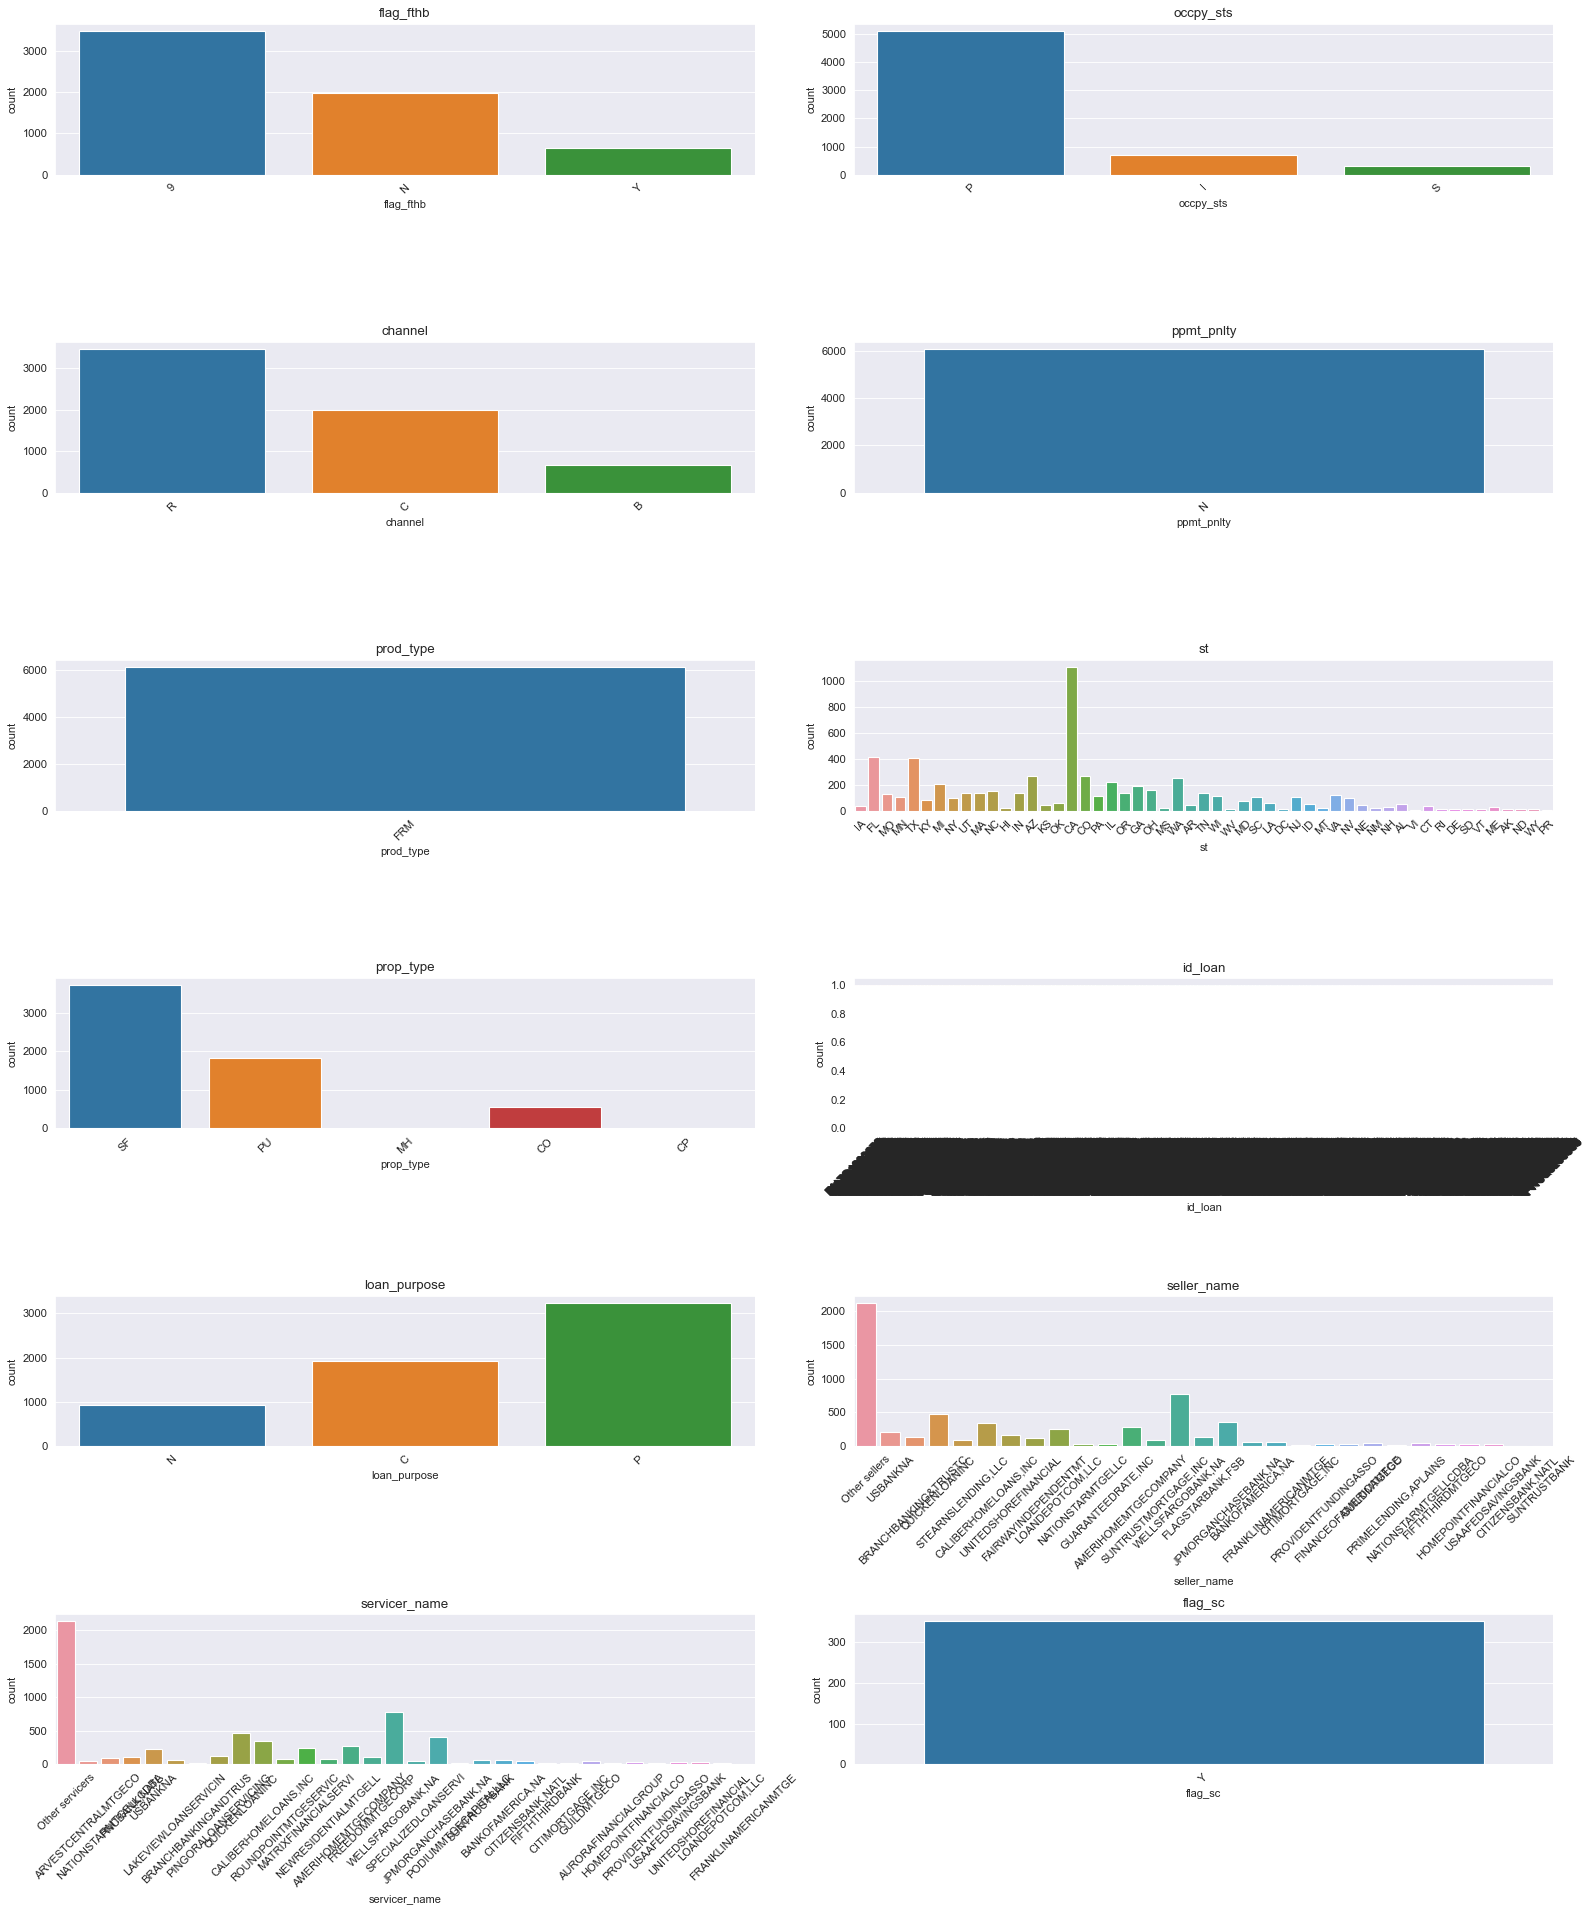

In [25]:
# Assuming category_cols is a list of your categorical column names
category_cols = d.select_dtypes(include=['object']).columns

# Set the number of columns for subplots
n_cols = 2
n_rows = (len(category_cols) + 1) // n_cols

# Set up the matplotlib figure
plt.figure(figsize=(20, 4 * n_rows))

# Loop through the number of columns and create a countplot for each one
for i, col in enumerate(category_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(data=d, x=col)
    plt.title(col)
    plt.xticks(rotation=45)

# Adjust layout for better display and show the plot
plt.tight_layout()
plt.show()


### Correlation between numerical features

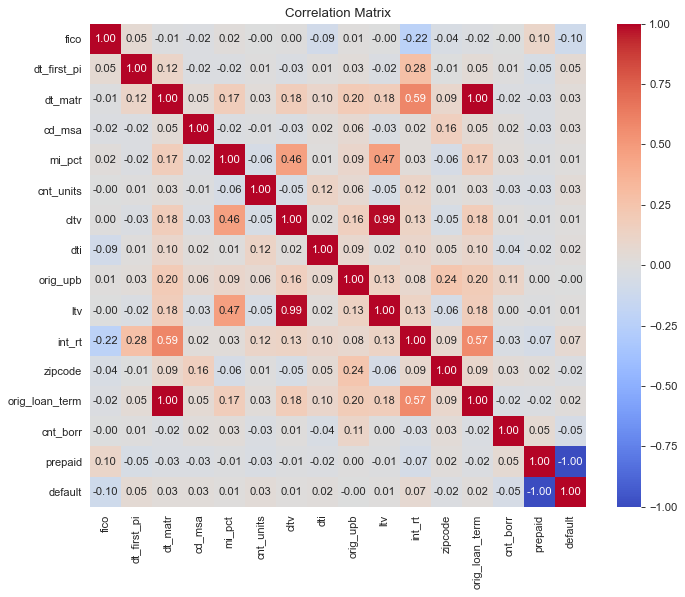

In [26]:
# Calculate the correlation matrix
corr = d[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [27]:
# Find the missing values in the data
d.isnull().sum()

fico                 1
dt_first_pi          0
flag_fthb            0
dt_matr              0
cd_msa             594
mi_pct               0
cnt_units            0
occpy_sts            0
cltv                 0
dti                  0
orig_upb             0
ltv                  0
int_rt               0
channel              0
ppmt_pnlty          38
prod_type            0
st                   0
prop_type            0
zipcode              0
id_loan              0
loan_purpose         0
orig_loan_term       0
cnt_borr             0
seller_name          0
servicer_name        0
flag_sc           5751
prepaid              0
default              0
dtype: int64

In [28]:
# Drop the missing value in 'fico'
d_new = d.dropna(subset=['fico'])

# Fill the missing value in 'cd_msa' and 'flag_sc' with 9
d_new['cd_msa'] = d_new['cd_msa'].fillna(9)
d_new['flag_sc'] = d_new['flag_sc'].fillna(9)
d_new= d_new.drop('prepaid', axis=1)
d_new= d_new.drop('id_loan', axis=1)

# Convert 'cd_msa' and 'zipcode' columns to 'object' data type
d_new['cd_msa'] = d_new['cd_msa'].astype('object')
d_new['zipcode'] = d_new['zipcode'].astype('object')

In [29]:
# List of numerical features
numeric_features = d_new.select_dtypes(include=['int64', 'float64']).drop(['default'], axis=1).columns

# List of categorical features
categorical_features = d_new.select_dtypes(include=['object']).columns

# Define the target variable
y = d_new['default']

# Define class labels 
class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels if available


In [30]:
# Scaling for numerical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Convert all categorical features to strings
for col in categorical_features:
    d_new[col] = d_new[col].astype(str)

# Continue with the encoding process as before
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Applying the transformations to the data
X_processed = preprocessor.fit_transform(d_new)

print(X_processed.shape)


(6103, 1231)


## Dimensionality Reduction (PCA)

In [31]:
X_dense = X_processed.toarray()  # Convert to dense matrix if not too large
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_dense)


print(f"Original number of features: {X_processed.shape[1]}")
print(f"Reduced number of features: {X_pca.shape[1]}")


Original number of features: 1231
Reduced number of features: 155


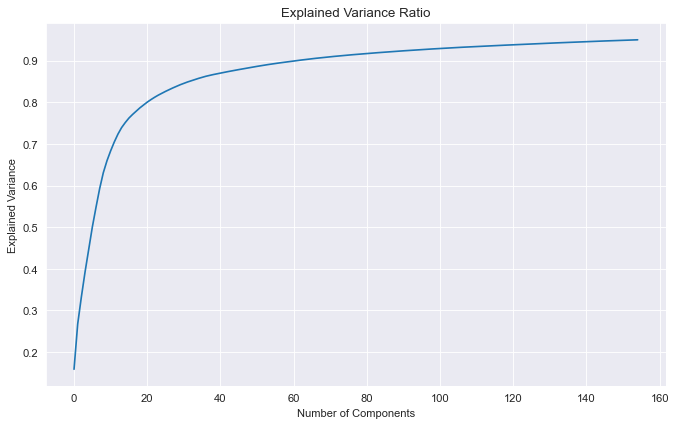

In [32]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()


## Feature Selection and New Features Creation

#### Selecting Features with High Variance 我感觉只保留这一个就可以了欸

In [33]:
# set the threshold to 0.01
selector = VarianceThreshold(threshold=0.01) # select features with variance above 0.01
X_high_variance = selector.fit_transform(X_pca)

print(X_high_variance.shape)


(6103, 101)


#### Recursive Feature Elimination (RFE)

RFE (Recursive Feature Elimination) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. It is a greedy optimization algorithm that aims to find the best performing subset of features. The number of features to keep is specified by the user and the algorithm starts by considering all features and eliminates the least important features one by one until the specified number of features is reached.

In [104]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# 
# # Define a simpler model for RFE, or reduce the number of estimators
# estimator = RandomForestClassifier(n_estimators=50, random_state=42)  # Less estimators
# 
# # Define the RFE selector with the estimator and a reduced number of features to select
# rfe_selector = RFE(estimator, n_features_to_select=5, step=5)  # Adjust step to remove more features each iteration
# 
# # Fit the RFE selector to the data - this might still take some time
# rfe_selector.fit(X_pca, y)
# 
# # Get the selected features
# selected_features = rfe_selector.support_
# 
# # Print the selected feature indices
# selected_indices = [i for i, selected in enumerate(selected_features) if selected]
# print("Selected feature indices:", selected_indices)
# 
# # Optionally, you can print the ranking of features
# print("Feature rankings:", rfe_selector.ranking_)


KeyboardInterrupt: 

#### New Features Creation

In [ ]:
# # Create five bins for the 'fico' column
# bins = [300, 580, 670, 740, 800, 850] # fico score ranges
# labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
# d_new['fico_category'] = pd.cut(d_new['fico'], bins=bins, labels=labels, right=False)
# 
# # do log transformation on 'fico'
# d_new['fico_log'] = np.log(d_new['fico'] + 1)


## Split the data into training and testing sets

In [34]:
# Split the data into training and testing sets
X_train_processed, X_test_processed, y_train_processed, y_test_processed = train_test_split(X_processed, y, test_size=0.2, random_state=42)
# Split the data into training and testing sets
X_train_hv, X_test_hv, y_train_hv, y_test_hv = train_test_split(X_high_variance, y, test_size=0.2, random_state=42)


## SMOTE

In [35]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_train_smote, y_train_smote = smote.fit_resample(X_train_hv, y_train_hv)

# Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, interaction terms, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validating it.*

*For example if you considered a linear regression model, a polynomial regression, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

*Finally, you should also provide comparison of your model with baseline model(s) on the test data but only briefly describe the baseline model(s) considered*

## Baseline Model -- Decision Tree

#### Baseline Model with Processed Data

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1199
           1       0.16      0.18      0.17        22

    accuracy                           0.97      1221
   macro avg       0.57      0.58      0.58      1221
weighted avg       0.97      0.97      0.97      1221


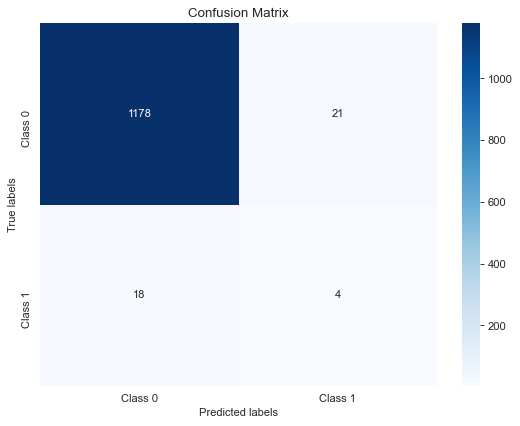

In [51]:
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train_processed, y_train_processed)

# Predict on the testing data
y_pred_dt_processed = dt_classifier.predict(X_test_processed)
# Generate the classification report
report_dt_processed = classification_report(y_test_processed,y_pred_dt_processed)
# Print the classification report
print("Classification Report:")
print(report_dt_processed)
# Calculate the confusion matrix
conf_matrix_dt_processed = confusion_matrix(y_test_processed,y_pred_dt_processed)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_processed, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


#### Baseline Model for PCA Data

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1199
           1       0.09      0.14      0.11        22

    accuracy                           0.96      1221
   macro avg       0.54      0.56      0.55      1221
weighted avg       0.97      0.96      0.96      1221


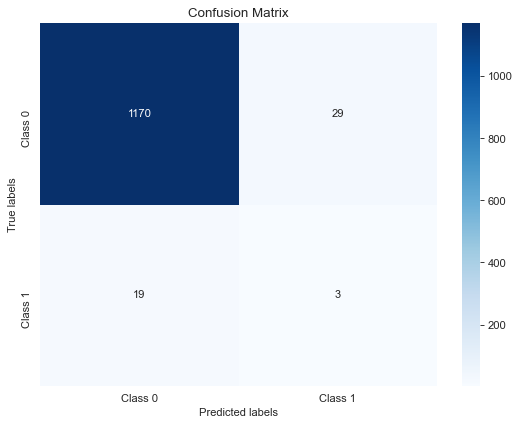

In [52]:
# Initialize the decision tree classifier
dt_classifier_hv = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier_hv.fit(X_train_hv, y_train_hv)

# Predict on the testing data
y_pred_dt_hv = dt_classifier_hv.predict(X_test_hv)
# Generate the classification report
report_dt_hv = classification_report(y_test_hv,y_pred_dt_hv)
# Print the classification report
print("Classification Report:")
print(report_dt_hv)
# Calculate the confusion matrix
conf_matrix_dt_hv = confusion_matrix(y_test_hv,y_pred_dt_hv )
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_hv, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## SMOTE with pca data 

### Decision Tree with SMOTE

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1199
           1       0.01      0.05      0.02        22

    accuracy                           0.93      1221
   macro avg       0.50      0.49      0.49      1221
weighted avg       0.96      0.93      0.94      1221


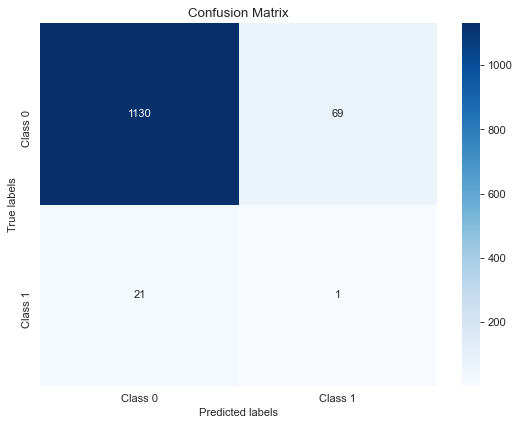

In [53]:
# Initialize the decision tree classifier
dt_classifier_smote = DecisionTreeClassifier(random_state=42)

# Train the classifier on the resampled data
dt_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred_smote_dt = dt_classifier_smote.predict(X_test_hv)
# Generate the classification report
report_smote_dt = classification_report(y_test_hv,y_pred_smote_dt)

# Print the classification report
print("Classification Report:")
print(report_smote_dt)
# Assuming y_test and y_pred are the true labels and predicted labels, respectively
# Calculate the confusion matrix
conf_matrix_dt_smote = confusion_matrix(y_test_hv,y_pred_smote_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_smote, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest with SMOTE

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1199
           1       0.29      0.09      0.14        22

    accuracy                           0.98      1221
   macro avg       0.63      0.54      0.56      1221
weighted avg       0.97      0.98      0.97      1221


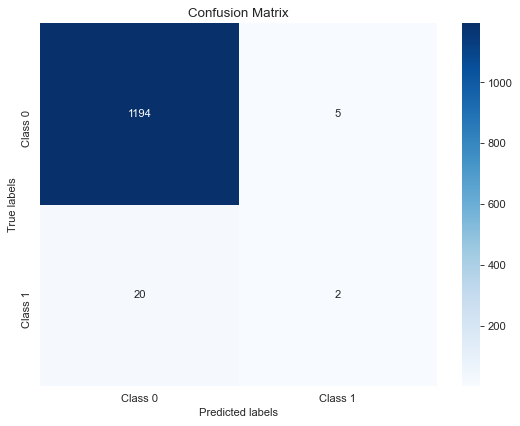

In [54]:
# Initialize the random forest classifier
rf_classifier_smote = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred_smote_rf = rf_classifier_smote.predict(X_test_hv)

# Generate the classification report
report_smote_rf = classification_report( y_test_hv,y_pred_smote_rf)

# Print the classification report
print("Classification Report:")
print(report_smote_rf)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_hv,y_pred_smote_rf)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Gradient Boosting with SMOTE

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1199
           1       0.11      0.36      0.16        22

    accuracy                           0.93      1221
   macro avg       0.55      0.65      0.57      1221
weighted avg       0.97      0.93      0.95      1221


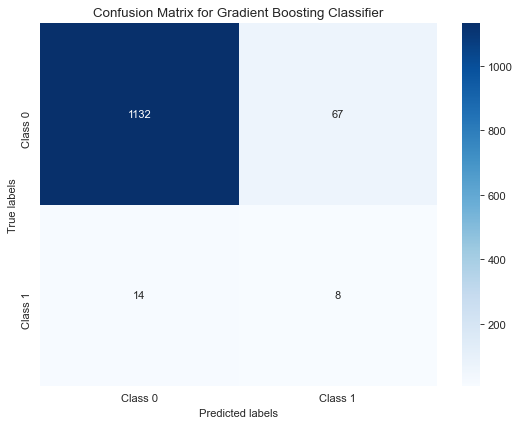

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_smote, y_train_smote, X_test, y_test are defined and prepared
# Assuming class_labels are defined for labeling the confusion matrix

# Initialize the Gradient Boosting Classifier
gb_classifier_smote = GradientBoostingClassifier(random_state=42)

# Train the classifier
gb_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_smote_gb = gb_classifier_smote.predict(X_test_hv)

# Generate classification report
report_smote_gb = classification_report( y_test_hv,y_pred_smote_gb)

# Print classification report
print("Classification Report:")
print(report_smote_gb)

# Compute confusion matrix
conf_matrix_gb = confusion_matrix(y_test_hv,y_pred_smote_gb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()


### XGBoost with SMOTE

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1199
           1       0.08      0.05      0.06        22

    accuracy                           0.97      1221
   macro avg       0.53      0.52      0.52      1221
weighted avg       0.97      0.97      0.97      1221


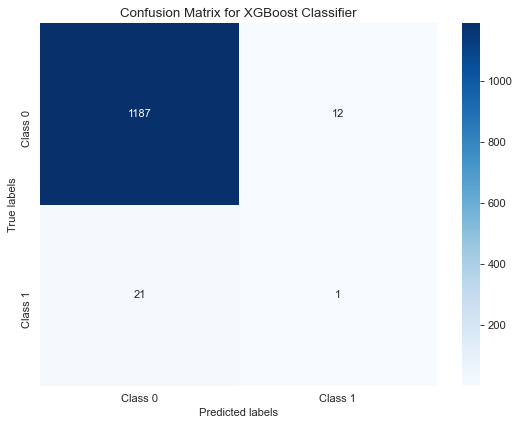

In [57]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_classifier_smote = xgb.XGBClassifier(random_state=42)

# Train the classifier
xgb_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred_smote_xgb = xgb_classifier_smote.predict(X_test_hv)

# Generate the classification report
report_smote_xgb = classification_report( y_test_hv,y_pred_smote_xgb)

# Print the classification report
print("Classification Report:")
print(report_smote_xgb)

# Calculate the confusion matrix
conf_matrix_xgb = confusion_matrix( y_test_hv,y_pred_smote_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()


### LightGBM with SMOTE

[LightGBM] [Info] Number of positive: 4792, number of negative: 4792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25755
[LightGBM] [Info] Number of data points in the train set: 9584, number of used features: 101
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1199
           1       0.15      0.09      0.11        22

    accuracy                           0.97      1221
   macro avg       0.57      0.54      0.55      1221
weighted avg       0.97      0.97      0.97      1221


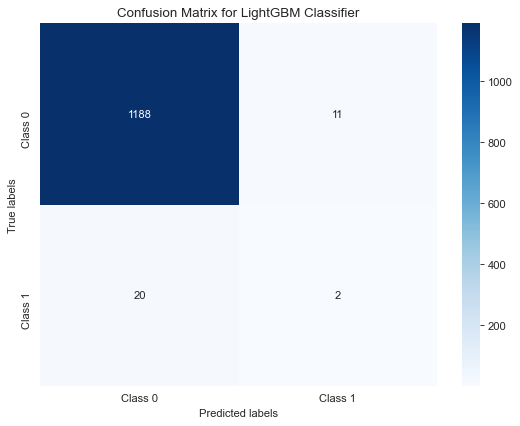

In [58]:
import lightgbm as lgb

# Initialize the LightGBM classifier
lgb_classifier_smote = lgb.LGBMClassifier(random_state=42)

# Train the classifier on the training data
lgb_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred_smote_lgb = lgb_classifier_smote.predict(X_test_hv)

# Generate the classification report
report_smote_lgb = classification_report(y_test, y_pred_smote_lgb)

# Print the classification report
print("Classification Report:")
print(report_smote_lgb)

# Calculate the confusion matrix
conf_matrix_lgb = confusion_matrix(y_test_hv, y_pred_smote_lgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for LightGBM Classifier')
plt.show()


### CatBoost with SMOTE

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1199
           1       0.21      0.14      0.17        22

    accuracy                           0.98      1221
   macro avg       0.60      0.56      0.58      1221
weighted avg       0.97      0.98      0.97      1221


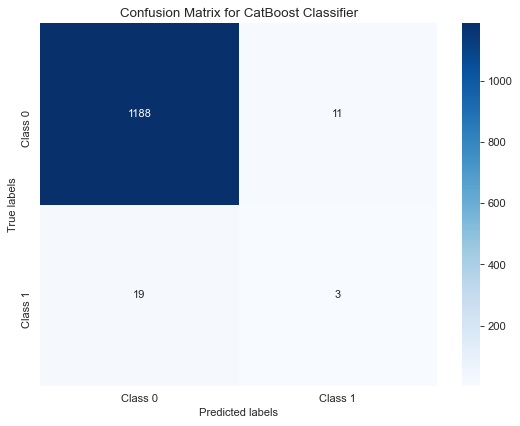

In [59]:
from catboost import CatBoostClassifier
# Initialize the CatBoost classifier
catboost_classifier_smote = CatBoostClassifier(random_state=42, verbose=0)

# Train the classifier on the training data
catboost_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred_smote_catboost = catboost_classifier_smote.predict(X_test_hv)

# Generate the classification report
report_smote_catboost = classification_report(y_test_hv, y_pred_smote_catboost)

# Print the classification report
print("Classification Report:")
print(report_smote_catboost)

# Calculate the confusion matrix
conf_matrix_catboost = confusion_matrix(y_test_hv, y_pred_smote_catboost)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_catboost, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()


### AdaBoost with SMOTE

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1199
           1       0.07      0.41      0.12        22

    accuracy                           0.89      1221
   macro avg       0.53      0.66      0.53      1221
weighted avg       0.97      0.89      0.93      1221


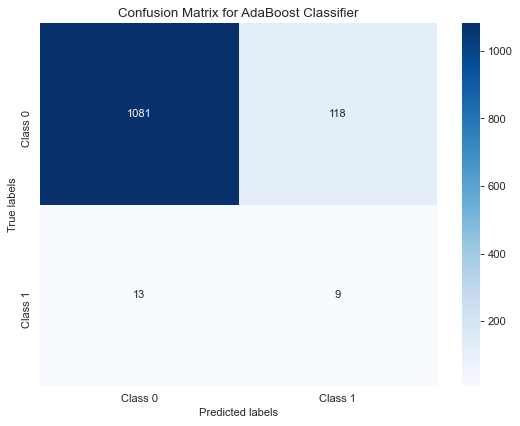

In [60]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize the AdaBoost classifier
adaboost_classifier_smote = AdaBoostClassifier(random_state=42)

# Train the classifier on the training data
adaboost_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred_smote_adaboost = adaboost_classifier_smote.predict(X_test_hv)

# Generate the classification report
report_smote_adaboost = classification_report(y_test_hv, y_pred_smote_adaboost)

# Print the classification report
print("Classification Report:")
print(report_smote_adaboost)

# Calculate the confusion matrix
conf_matrix_adaboost = confusion_matrix(y_test_hv, y_pred_smote_adaboost)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()


### Support Vector Machine with SMOTE

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1199
           1       0.20      0.23      0.21        22

    accuracy                           0.97      1221
   macro avg       0.59      0.61      0.60      1221
weighted avg       0.97      0.97      0.97      1221


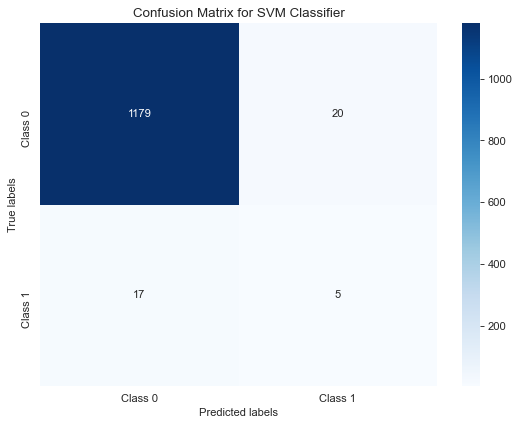

In [61]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_classifier_smote = SVC(random_state=42)

# Train the classifier on the training data
svm_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred_smote_svm = svm_classifier_smote.predict(X_test_hv)

# Generate the classification report
report_smote_svm = classification_report(y_test_hv, y_pred_smote_svm)

# Print the classification report
print("Classification Report:")
print(report_smote_svm)

# Calculate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test_hv, y_pred_smote_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


### Gaussian Naive Bayes with SMOTE

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1199
           1       0.03      0.50      0.06        22

    accuracy                           0.73      1221
   macro avg       0.51      0.62      0.45      1221
weighted avg       0.97      0.73      0.83      1221


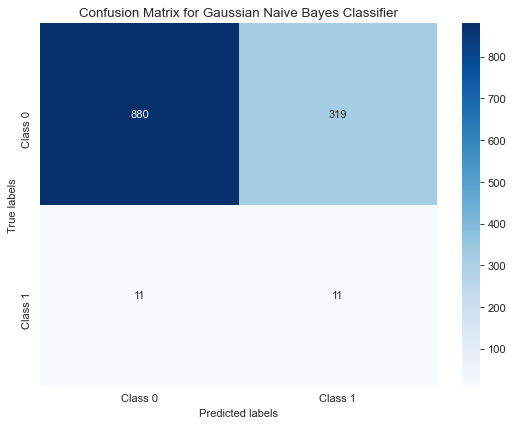

In [63]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes classifier
nb_classifier_smote = GaussianNB()

# Train the classifier on the training data
nb_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred_smote_nb = nb_classifier_smote.predict(X_test_hv)

# Generate the classification report
report_smote_nb = classification_report(y_test_hv, y_pred_smote_nb)

# Print the classification report
print("Classification Report:")
print(report_smote_nb)

# Calculate the confusion matrix
conf_matrix_nb = confusion_matrix(y_test_hv, y_pred_smote_nb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()


### Neural Network with SMOTE

Epoch 1/10
75/75 [==============================] - 3s 14ms/step - loss: 5.6287 - precision_20: 0.7225
Epoch 2/10
75/75 [==============================] - 1s 14ms/step - loss: 1.6936 - precision_20: 0.8046
Epoch 3/10
75/75 [==============================] - 1s 15ms/step - loss: 1.7540 - precision_20: 0.7964
Epoch 4/10
75/75 [==============================] - 1s 15ms/step - loss: 1.5349 - precision_20: 0.8338
Epoch 5/10
75/75 [==============================] - 1s 15ms/step - loss: 1.5493 - precision_20: 0.8343
Epoch 6/10
75/75 [==============================] - 1s 16ms/step - loss: 1.4752 - precision_20: 0.8474
Epoch 7/10
75/75 [==============================] - 1s 16ms/step - loss: 1.4160 - precision_20: 0.8574
Epoch 8/10
75/75 [==============================] - 1s 16ms/step - loss: 1.5132 - precision_20: 0.8545
Epoch 9/10
75/75 [==============================] - 1s 16ms/step - loss: 1.2814 - precision_20: 0.8814
Epoch 10/10
39/39 [==============================] - 0s 3ms/step
Classifi

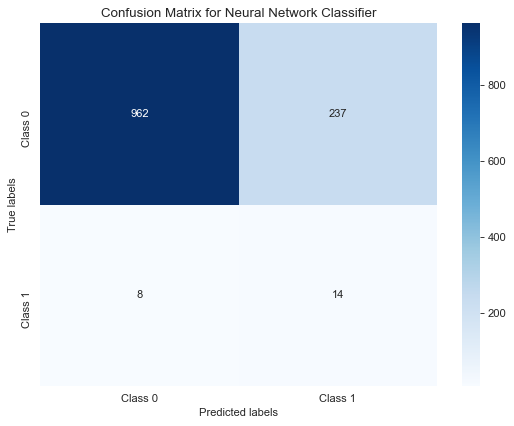

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight as cw
import tensorflow as tf
from tensorflow.keras.metrics import Precision
# Define a custom loss function

def weighted_binary_crossentropy(y_true, y_pred):
    # 计算二分类的交叉熵损失
    bce = K.binary_crossentropy(y_true, y_pred)
    # 获取类别1的权重
    class_weight_for_1 = 100.0  # 示例权重，根据需要调整
    # 计算权重向量，为类别1应用更大的权重
    weight_vector = y_true * class_weight_for_1 + (1. - y_true)
    weighted_bce = weight_vector * bce
    return K.mean(weighted_bce)

# Calculate class weights which will be used during training
class_weights = cw.compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Neural networks expect one-hot encoded outputs for multiclass classification
y_train_smote_one_hot = to_categorical(y_train_smote)
y_test_hv_one_hot = to_categorical(y_test_hv)

# Define a precision metric for class 1
precision_class_1 = Precision(class_id=1)

nn_classifier = Sequential([
    Dense(512, activation='swish', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.4),
    Dense(512, activation='swish'),
    Dropout(0.4),
    Dense(512, activation='swish'),
    Dropout(0.4),
    Dense(512, activation='swish'),
    Dropout(0.4),
    Dense(512, activation='swish'),
    Dropout(0.4),
    Dense(256, activation='swish'),
    Dropout(0.4),
    Dense(y_train_smote_one_hot.shape[1], activation='softmax')  # Assuming this is for a multi-class classification problem
])

# Compile the neural network with the custom precision metric for class 1
nn_classifier.compile(optimizer='adam', loss=weighted_binary_crossentropy, metrics=[precision_class_1])


# Train the classifier on the training data, using class weights
#nn_classifier.fit(X_train_smote, y_train_smote_one_hot, epochs=10, batch_size=128, class_weight=class_weights_dict)
nn_classifier.fit(X_train_smote, y_train_smote_one_hot, epochs=10, batch_size=128)
# Predict on the testing data
y_pred_smote_nn = nn_classifier.predict(X_test_hv)
y_pred_smote_nn_classes = y_pred_smote_nn.argmax(axis=1)  # Convert probabilities to class labels

# Generate the classification report
report_smote_nn = classification_report(y_test_hv, y_pred_smote_nn_classes)

# Print the classification report
print("Classification Report:")
print(report_smote_nn)

# Calculate the confusion matrix
conf_matrix_nn = confusion_matrix(y_test_hv, y_pred_smote_nn_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Neural Network Classifier')
plt.show()


# Discussion & Conclusions

*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a government official or charity directy, who is understands the pressing challenges associated with ageining and dementia but may only have university level mathematics (not necessarily postgraduate statistics or machine learning). Your goal should be to highlight to this audience how your model can useful. You should also mention potential limitations of your model.*

*Finally, you should include recommendations on potential lifestyle changes or governmental/societal interventions to reduce dementia risk.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

# References

*Include references if any*

In [23]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf project2.ipynb

[NbConvertApp] Converting notebook project2.ipynb to pdf
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('block_group' was unexpected)

Failed validating 'additionalProperties' in markdown_cell:

On instance['cells'][0]:
{'block_group': 'd12f5692dbf546e09c5366fefe31e721',
 'cell_type': 'markdown',
 'metadata': {'cell_id': 'a9c673f4b97f45d0975f547cb6070545',
              'deepnote_cell_type': 'markdown'},
 'source': '# Machine Learning in Python - Project 2\n'
           '\n'
           'Due Friday, April 12th...'}
[NbConvertApp] ERROR | Error while converting 'project2.ipynb'
Traceback (most recent call last):
  File "/Users/scarlettj/PycharmProjects/Numerical Linear Algebra/venv/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 479, in export_single_notebook
    output, resources = self.exporter.from_filename(
  File "/Users/scarlettj/PycharmProjects/Numerical Linear Algebra/venv/lib/python3.9/site-packages/nbconvert/exporters/templa

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2a9ec8d-a343-4210-b36b-f9db26268fc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>